In [54]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/jocelynpender/Documents/02 - AREAS/Career/2025 Update/Crossref/interview-prep/sample-data/aggregated_data_expanded_rows_trim.csv')

In [55]:
# Prepare variables for use in notebook

df['Has Reference: Outgoing'] = df['reference'].apply(lambda x: 'No References: Reference Field Not Used' if pd.isnull(x) else 'Has References')
df['Is Cited: Incoming'] = df['is-referenced-by-count'].apply(lambda x: 'Never Cited: Incoming' if x == 0 else 'Is Cited: Incoming' if x > 0 else None)
df['Log Is Cited By Count: Incoming'] = np.log1p(df['is-referenced-by-count'])
df['Log Reference-Count'] = np.log1p(df['reference-count'])


In [56]:
num_rows = df.shape[0]
distinct_members = df['member'].nunique()

print(f'Let\'s take a sample dataset represented by {num_rows} records represented by {distinct_members} unique members.')

Let's take a sample dataset represented by 10000 records represented by 1386 unique members.


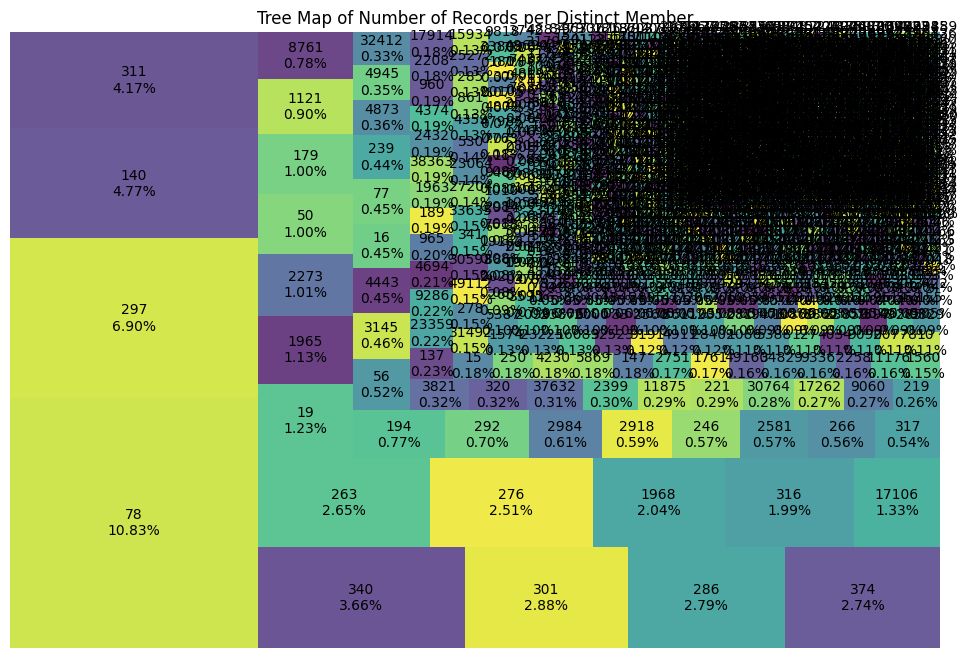

In [57]:
import squarify

import matplotlib.pyplot as plt

# Count the number of records per distinct member
member_counts = df['member'].value_counts()

# Create a tree map
plt.figure(figsize=(12, 8))
# Calculate the percentage of total number of records
labels = [f'{label}\n{count/num_rows:.2%}' for label, count in zip(member_counts.index, member_counts.values)]

# Update the plot with the new labels
squarify.plot(sizes=member_counts.values, label=labels, alpha=.8)
plt.title('Tree Map of Number of Records per Distinct Member')
plt.axis('off')
plt.show()

Only 10% of these works are cited by others.

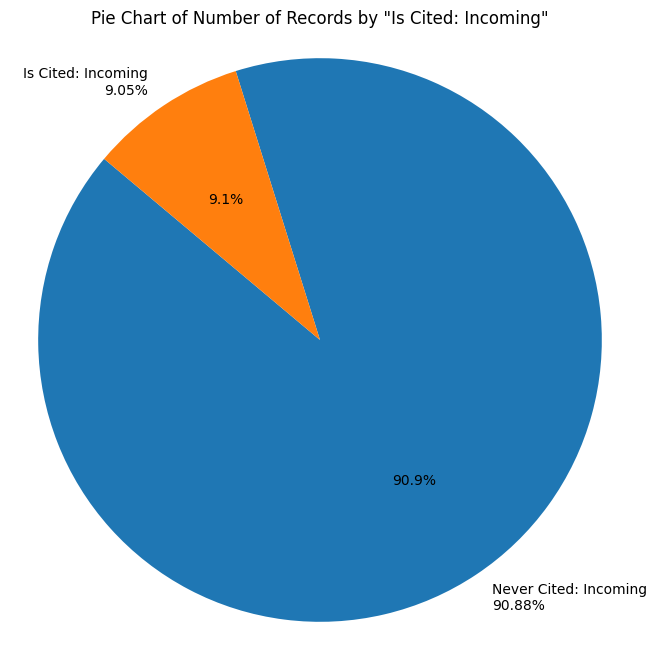

In [58]:
# Count the number of records by 'Is Cited: Incoming'
cited_counts = df['Is Cited: Incoming'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cited_counts, labels=[f'{label}\n{count/num_rows:.2%}' for label, count in zip(cited_counts.index, cited_counts.values)], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Number of Records by "Is Cited: Incoming"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

How many records use the reference field?

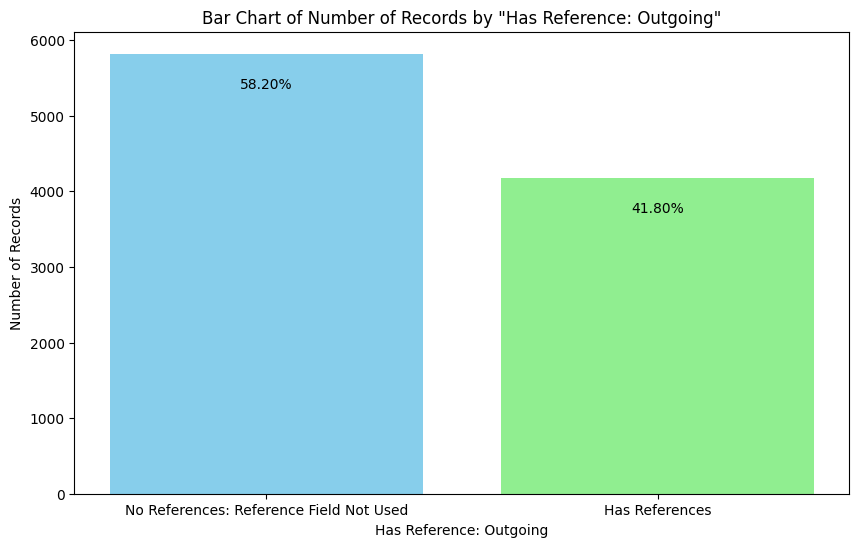

In [59]:
# Count the number of records by 'Has Reference: Outgoing'
reference_counts = df['Has Reference: Outgoing'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(reference_counts.index, reference_counts.values, color=['skyblue', 'lightgreen'])

# Add labels showing the percent total number of records
for bar, count in zip(bars, reference_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 500, f'{count/num_rows:.2%}', ha='center', va='bottom', color='black')

plt.title('Bar Chart of Number of Records by "Has Reference: Outgoing"')
plt.xlabel('Has Reference: Outgoing')
plt.ylabel('Number of Records')
plt.show()

Among these groups, how many records were cited by other works?

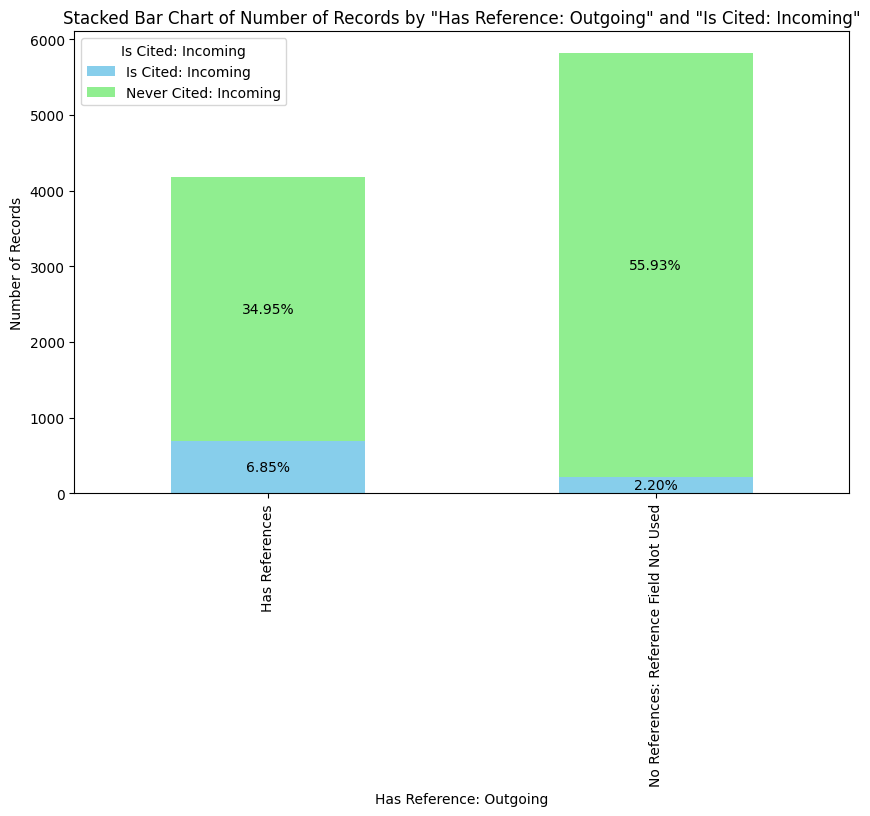

In [60]:
# Create a crosstab to get the counts
crosstab = pd.crosstab(df['Has Reference: Outgoing'], df['Is Cited: Incoming'])

# Plot the stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])

# Add labels showing the percent total number of records
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v/num_rows:.2%}' for v in container.datavalues], label_type='center')

plt.title('Stacked Bar Chart of Number of Records by "Has Reference: Outgoing" and "Is Cited: Incoming"')
plt.xlabel('Has Reference: Outgoing')
plt.ylabel('Number of Records')
plt.show()

Let's describe the groups.

In [61]:
# Group by 'Has Reference: Outgoing' and calculate descriptive statistics
descriptive_stats = df.groupby('Has Reference: Outgoing').agg({
    'is-referenced-by-count': ['mean', 'std'],
    'reference-count': ['mean', 'std']
})

# Rename columns for better readability
descriptive_stats.columns = ['Avg Is Referenced By Count', 'Std Is Referenced By Count', 'Avg Reference Count', 'Std Reference Count']

print(descriptive_stats)

                                         Avg Is Referenced By Count  \
Has Reference: Outgoing                                               
Has References                                             9.127512   
No References: Reference Field Not Used                    2.738173   

                                         Std Is Referenced By Count  \
Has Reference: Outgoing                                               
Has References                                            51.866407   
No References: Reference Field Not Used                   32.631990   

                                         Avg Reference Count  \
Has Reference: Outgoing                                        
Has References                                     41.855742   
No References: Reference Field Not Used             0.000000   

                                         Std Reference Count  
Has Reference: Outgoing                                       
Has References                                 

Let's visualize them to see differences in the number of citations (incoming).

<Figure size 1000x600 with 0 Axes>

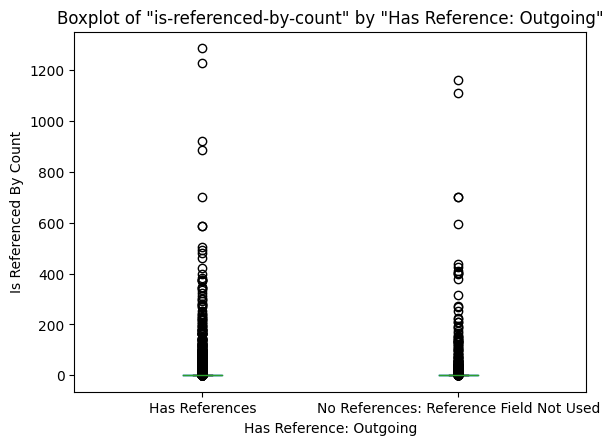

In [62]:
# Create a boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='is-referenced-by-count', by='Has Reference: Outgoing', grid=False)
plt.title('Boxplot of "is-referenced-by-count" by "Has Reference: Outgoing"')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Has Reference: Outgoing')
plt.ylabel('Is Referenced By Count')
plt.show()

You can see that most are not cited, therefore this makes it hard to understand and visualize the differences between the groups. Let's log transform the number of citations to better see group differences, despite the presence of many outliers.

<Figure size 1000x600 with 0 Axes>

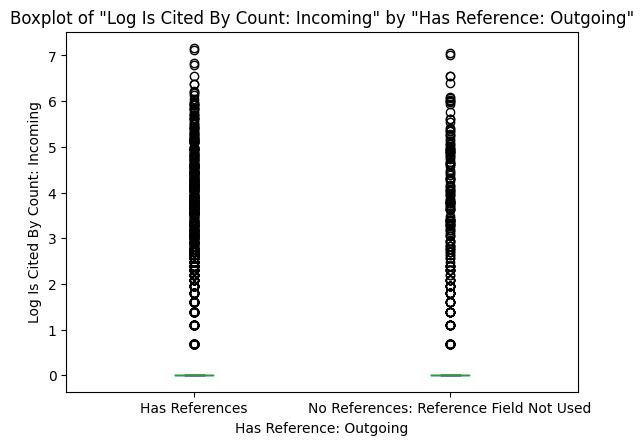

In [63]:
# Create a boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='Log Is Cited By Count: Incoming', by='Has Reference: Outgoing', grid=False)
plt.title('Boxplot of "Log Is Cited By Count: Incoming" by "Has Reference: Outgoing"')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Has Reference: Outgoing')
plt.ylabel('Log Is Cited By Count: Incoming')
plt.show()

The distribution of the number of incoming citations doesn't appear to differ much between groups. The average number of citations is likely influenced by extreme outliers in our sample dataset.
A t-test should help us to understand if any signifcant differences exist.


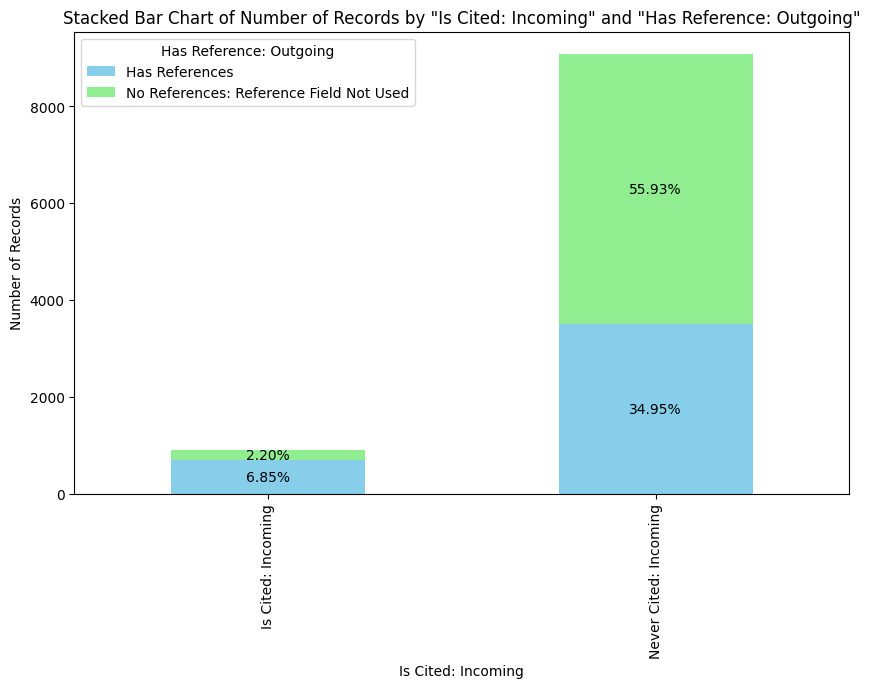

In [64]:
# TODO FIX COUNTS IN LABELS

# Create a crosstab to get the counts
crosstab = pd.crosstab(df['Is Cited: Incoming'], df['Has Reference: Outgoing'])

# Plot the stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])

# Add labels showing the percent total number of records
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v/num_rows:.2%}' for v in container.datavalues], label_type='center')

plt.title('Stacked Bar Chart of Number of Records by "Is Cited: Incoming" and "Has Reference: Outgoing"')
plt.xlabel('Is Cited: Incoming')
plt.ylabel('Number of Records')
plt.show()

Overall, those who submit reference data (use of the reference field) tend to be cited more, as a group. Those who are cited might be more likely as a group to deposit references.
But the magnitude of the effect is hard to determine due to the presence of outliers.

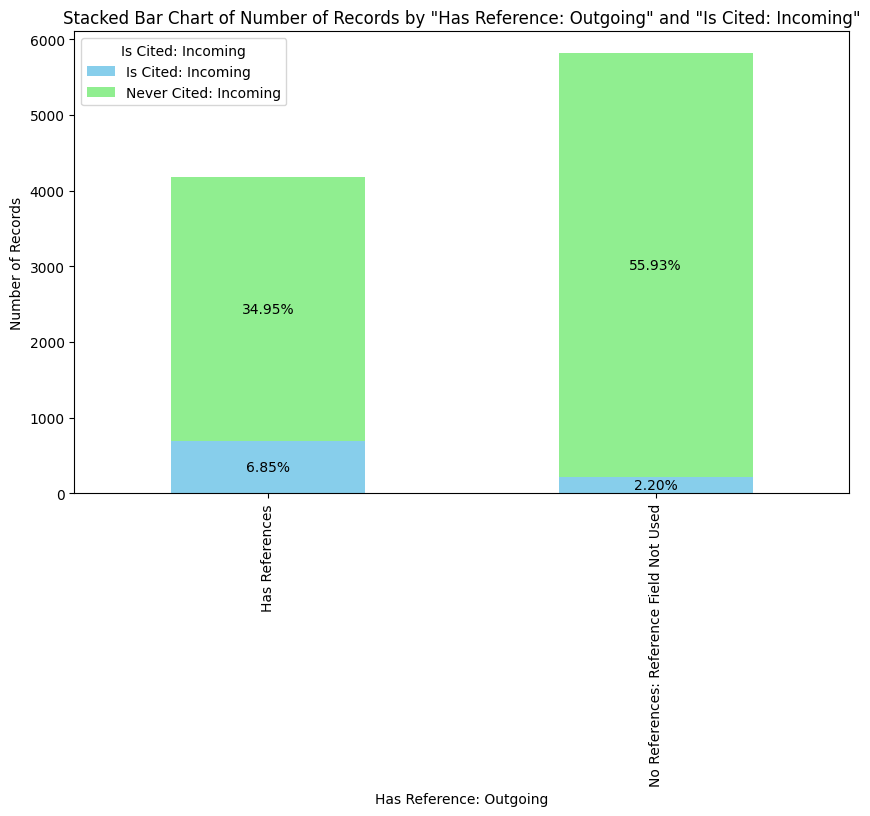

In [65]:
# TODO FIX COUNTS IN LABELS


# Create a crosstab to get the counts
crosstab = pd.crosstab(df['Has Reference: Outgoing'], df['Is Cited: Incoming'])

# Plot the stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])

# Add labels showing the percent total number of records
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v/num_rows:.2%}' for v in container.datavalues], label_type='center')

plt.title('Stacked Bar Chart of Number of Records by "Has Reference: Outgoing" and "Is Cited: Incoming"')
plt.xlabel('Has Reference: Outgoing')
plt.ylabel('Number of Records')
plt.show()